# Ensemble Methods and Random Forests

The idea behind ensemble methods is to combine the predictions of multiple models to get a better prediction.

There are two approaches to build ensembe methods:
* **averaging**: build several estimators independently (often training them only on a subset of samples and/or features) and then average their predictions (or use a majority-vote approach)
    * Bagging methods
    * Random forests
* **boosting**: combine many weak predictors to get a strong predictor. Train the models sequentially: the successor model will try to correct the wrong predictions of its predecessor.
    * AdaBoost
    * Gradient Boosting
    * XGBoost

## Setup

In [1]:
# Python ≥3.8 is required
import sys
assert sys.version_info >= (3, 8)

# Scikit-Learn ≥ 1.0 is required
import sklearn
assert sklearn.__version__ >= "1.0"

# Common imports
import numpy as np
import pandas as pd
import os

# To plot pretty figures
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

# Precision options
np.set_printoptions(precision=2)
pd.options.display.float_format = '{:.3f}'.format

### Bagging 

A Bagging classifier is an ensemble meta-estimator that fits base classifiers each on random subsets of the original dataset and then aggregate their individual predictions (either by voting or by averaging) to form a final prediction. Such a meta-estimator can typically be used as a way to reduce the variance of a black-box estimator (e.g., a decision tree), by introducing randomization into its construction procedure and then making an ensemble out of it.

We'll train and test a bagging ensemble model based on 100 decision trees, using an artificially contructed dataset generated with the `sklearn.dataset.make_moons()` function.

This will generate a non-linearly separable binary 2D dataset (the two classes are marked 0 and 1). We will also add some gaussian noise to the distribution.

In [2]:
from sklearn.datasets import make_moons
X, y = make_moons(
    n_samples=500,
    noise=0.2 # standard deviation of Gaussian noise added to the data.
)

In [3]:
X[:, 0]

array([-1.14e-02,  7.84e-01, -4.71e-01, -1.57e-01,  9.92e-02, -5.63e-01,
        5.12e-01,  1.37e+00,  5.98e-02, -9.04e-01, -8.26e-01,  9.80e-01,
        1.77e-01,  1.28e+00,  1.16e-01,  1.39e+00,  7.66e-01,  3.84e-01,
        1.18e+00, -9.21e-01, -7.46e-01, -7.09e-01,  2.17e+00,  1.02e+00,
        2.01e+00,  7.00e-01,  1.44e+00,  6.73e-01, -6.84e-01,  6.78e-01,
       -1.09e+00, -8.63e-01,  1.29e+00, -3.64e-01, -2.17e-01, -1.19e+00,
       -1.16e+00,  2.06e-01,  1.27e+00, -1.28e-01, -8.25e-01, -3.54e-01,
        2.51e-01,  1.00e+00, -1.29e-01,  7.48e-01,  9.55e-01, -6.61e-01,
       -3.81e-01,  1.12e-01,  1.29e+00,  2.98e-01,  5.41e-01,  1.61e+00,
        1.64e-01, -9.83e-01,  4.35e-01,  1.50e+00,  7.22e-01,  1.74e-01,
       -3.75e-01, -2.70e-01,  1.79e+00, -8.72e-01,  8.99e-01,  7.84e-01,
        1.27e+00, -8.72e-01, -5.79e-01, -4.42e-01,  2.23e+00,  1.84e+00,
        9.95e-01,  8.77e-01,  4.42e-01, -1.32e+00,  8.04e-01,  1.05e+00,
        1.28e+00, -7.58e-02,  1.33e+00,  1.58e+00, 

In [4]:
y

array([1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0,
       1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0,
       1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1,
       1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1,
       0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1,
       0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1,
       1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1,
       1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1,
       0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1,
       1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0,
       1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0,
       0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0,
       1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1,

If we plot the dataset, we can see that it generates two interleaving half circles.

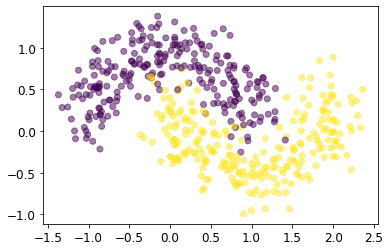

In [5]:
import matplotlib.pyplot as plt
_ = plt.scatter(
    X[:, 0], 
    X[:, 1], 
    c=y,
    alpha=0.5
)

Let's split the dataset into training and test set, and then train a `BaggingClassifier` using 100 Decision Trees.

In [7]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=77
)

In [11]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier

bag_clf = BaggingClassifier(
    base_estimator=DecisionTreeClassifier(),
    n_estimators=100,
    max_samples=100, # the namber of samples used to train each single classifier
    bootstrap=True, # sampling is performed with replacement
    n_jobs=-1 # number of estimators to run in parallel. If -1 use all processor
)

Let's train the model using 5-fold cross-validation. It is fair to use "accuracy" as a performance metric as our dataset is well balanced.

In [13]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(bag_clf, X_train, y_train, cv=5, scoring="accuracy")

In [14]:
import numpy as np
np.mean(scores)

0.9550000000000001

That looks not bad at all.

## Random Forests

Random Forests are an ensemble of decision trees generally trained using the bagging method, typically with `max_samples` set to the size of the training set.

The `RandomForestClassifier` compared to the `BaggingClassifier` is optimized for decision trees. The Random Forest algorithm searches the best feature to split a node among a random subset of features rather than among all possible features. This extra randomness increases the resulting trees diversity, resulting into a higher bias and lower variance, and overall producing a more performant model.

In [15]:
from sklearn.ensemble import RandomForestClassifier
rf_clf = RandomForestClassifier(
    n_estimators=100,
    max_leaf_nodes=16, 
    bootstrap=True, # sampling is performed with replacement
    n_jobs=-1 # number of estimators to run in parallel. If -1 use all processor
)
scores = cross_val_score(rf_clf, X_train, y_train, cv=5, scoring="accuracy")

In [16]:
scores

array([0.97, 0.94, 0.94, 0.97, 0.94])

In [17]:
np.mean(scores)

0.9525

**Exercise:** evaluate the performance of the two approaches (`BaggingClassifier` and `RandomForestClassifier`) using different metrics, and argue which of the two yields the better result. You can also explore the hyperparameter space with grid or random search to find a good combination of hyperparameters.

In [ ]:
# Write your solution here
